# delhi house price prediction

In [2]:
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<ipython-input-2-250a9879ba4a>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('MagicBricks.csv')

In [42]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 83.7+ KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,1259.0,1.466453e+03,1.568055e+03,28.0,800.0,1200.0,1700.0,24300.0
BHK,1259.0,2.796664e+00,9.544249e-01,1.0,2.0,3.0,3.0,10.0
Bathroom,1257.0,2.556086e+00,1.042220e+00,1.0,2.0,2.0,3.0,7.0
Parking,1226.0,1.935563e+00,6.279212e+00,1.0,1.0,1.0,2.0,114.0
Price,1259.0,2.130670e+07,2.560115e+07,1000000.0,5700000.0,14200000.0,25500000.0,240000000.0
Per_Sqft,1018.0,1.569014e+04,2.113474e+04,1259.0,6364.0,11291.5,18000.0,183333.0


# feature engineering

In [45]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [46]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [47]:
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

In [48]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [49]:
df[['Parking', 'Bathroom']].astype('int64')

,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


In [50]:
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [51]:
print(df['Area'].value_counts(),'\n', df['BHK'].value_counts(),'\n', df['Bathroom'].value_counts(),'\n', df['Parking'].value_counts(),'\n', df['Furnishing'].value_counts(),'\n', df['Status'].value_counts(),'\n', df['Transaction'].value_counts(),'\n', df['Type'].value_counts(),'\n', df['Per_Sqft'].value_counts())

Area
900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: count, Length: 315, dtype: int64 
 BHK
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: count, dtype: int64 
 Bathroom
2.0    553
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: count, dtype: int64 
 Parking
1.0      829
2.0      341
3.0       54
4.0       16
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: count, dtype: int64 
 Furnishing
Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: count, dtype: int64 
 Status
Ready_to_move    1184
Almost_ready       75
Name: count, dtype: int64 
 Transaction
Resale          781
New_Property    478
Name: count, dtype: int64 
 Type
Builder_Floor    666
Apartment        593
Name: count, dtype: int64 
 Per_Sqft
12500.000000    37
3524.000000     28
6667.000000     27
14818.000000    

In [52]:
df['Area_Yards'] = df['Area']/9

In [53]:
df['Locality'].unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

In [54]:
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(grp_local)

In [55]:
df['Locality'].value_counts()

Locality
Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: count, dtype: int64

In [56]:
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z < 3).all(axis=1)]

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,1189.0,1.296422e+03,7.502848e+02,28.000000,8.000000e+02,1.150000e+03,1.600000e+03,5220.0
BHK,1189.0,2.735913e+00,8.592322e-01,1.000000,2.000000e+00,3.000000e+00,3.000000e+00,5.0
Bathroom,1189.0,2.483600e+00,9.521066e-01,1.000000,2.000000e+00,2.000000e+00,3.000000e+00,5.0
Parking,1189.0,1.410429e+00,7.199132e-01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,10.0
Price,1189.0,1.852459e+07,1.772598e+07,1000000.000000,5.510000e+06,1.350000e+07,2.490000e+07,93000000.0
Per_Sqft,1189.0,1.262979e+04,8.434085e+03,1250.000000,6.526000e+03,1.094300e+04,1.658400e+04,72000.0
Area_Yards,1189.0,1.440468e+02,8.336498e+01,3.111111,8.888889e+01,1.277778e+02,1.777778e+02,580.0


# data visualization

Text(0.5, 1.0, 'Area in Yards')

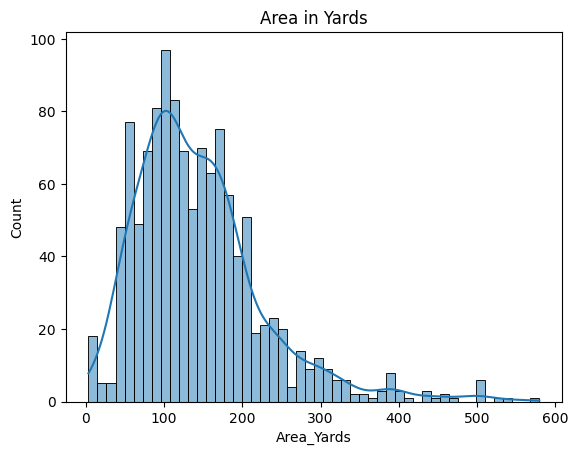

In [58]:
sns.histplot(x = df['Area_Yards'],  kde = True, bins = 50).set_title('Area in Yards')

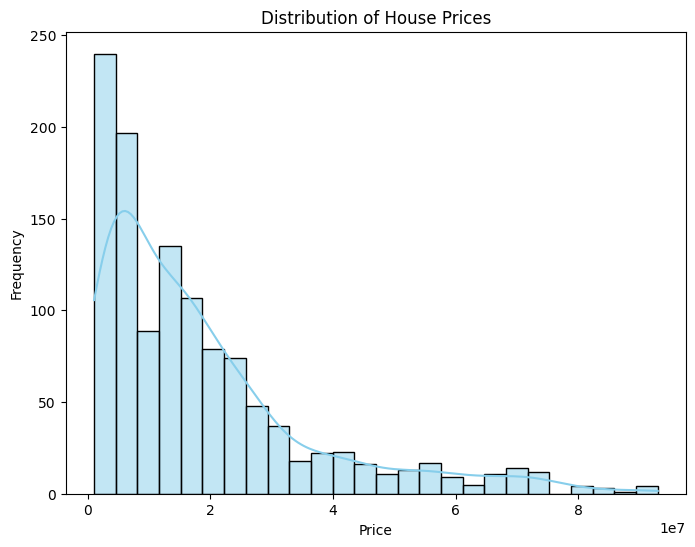

In [59]:
plt.figure(figsize=(8,6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

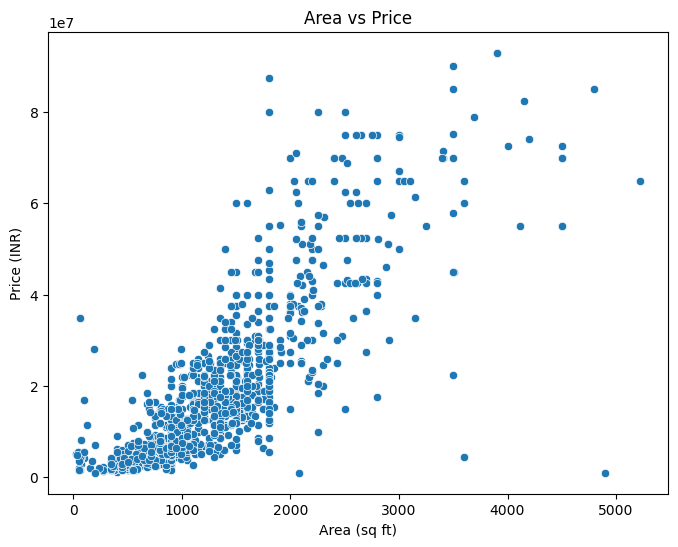

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (INR)')
plt.show()

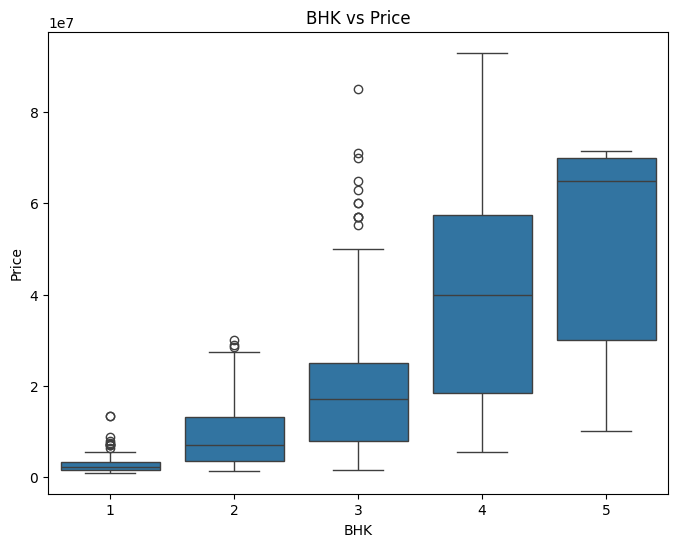

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(x='BHK', y='Price', data=df)
plt.title('BHK vs Price')
plt.show()

Text(0.5, 1.0, 'BHK')

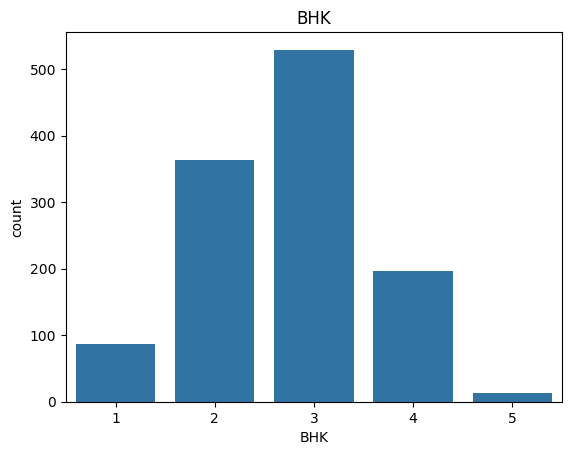

In [62]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')

Text(0.5, 1.0, 'Bathroom')

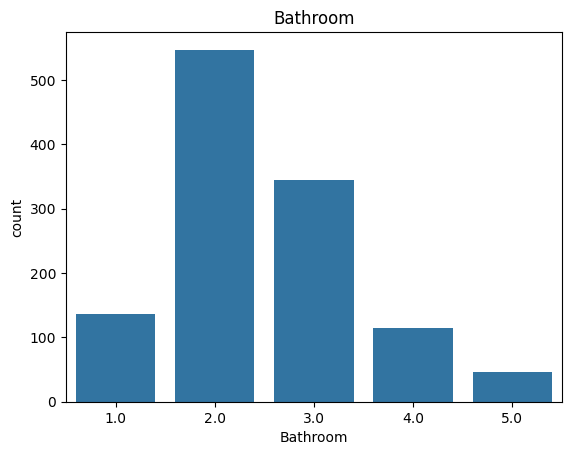

In [63]:
sns.countplot(x = 'Bathroom', data = df).set_title('Bathroom')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

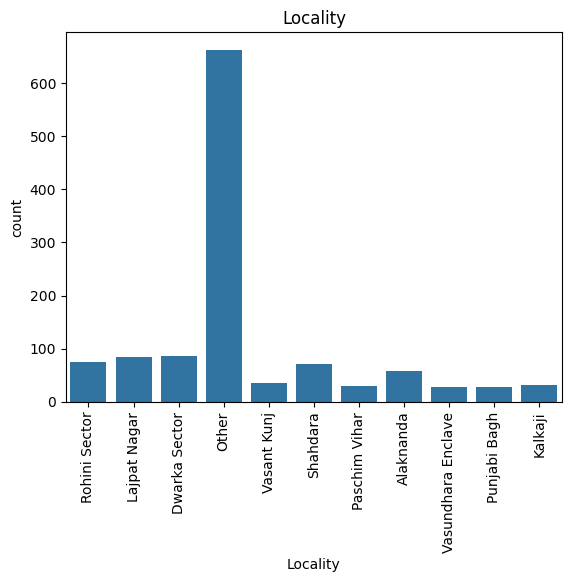

In [64]:
sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Parking')

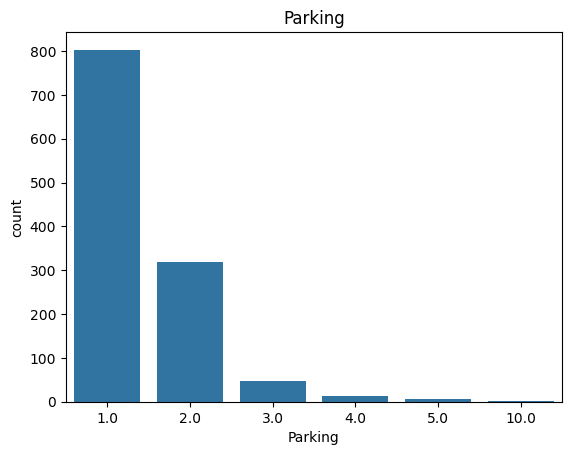

In [65]:
sns.countplot(x = 'Parking', data = df).set_title('Parking')

Text(0.5, 1.0, 'Status of the Property')

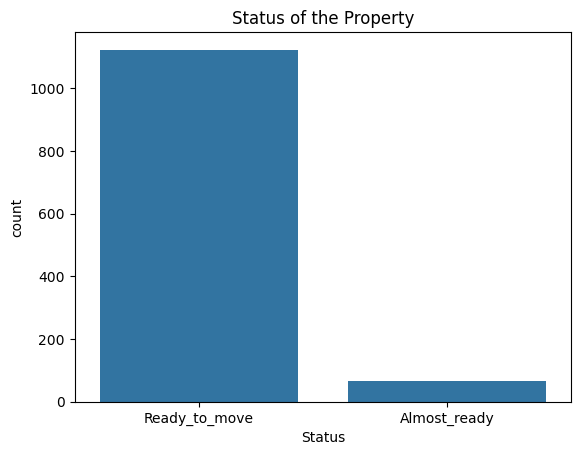

In [66]:
sns.countplot(x = 'Status', data = df).set_title('Status of the Property')

Text(0.5, 1.0, 'Transaction Type')

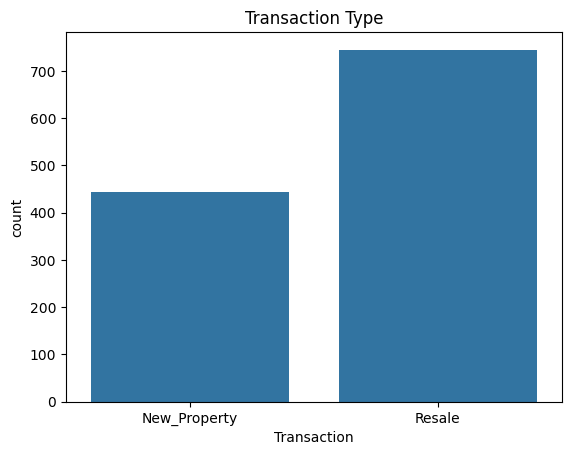

In [67]:
sns.countplot(x='Transaction', data=df).set_title('Transaction Type')

Text(0.5, 1.0, 'Type of House')

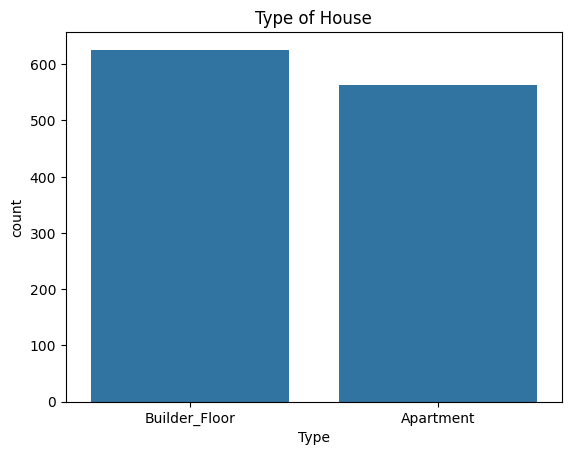

In [68]:
sns.countplot(x='Type',data=df).set_title('Type of House')

Text(0.5, 1.0, 'Bathroom vs Price')

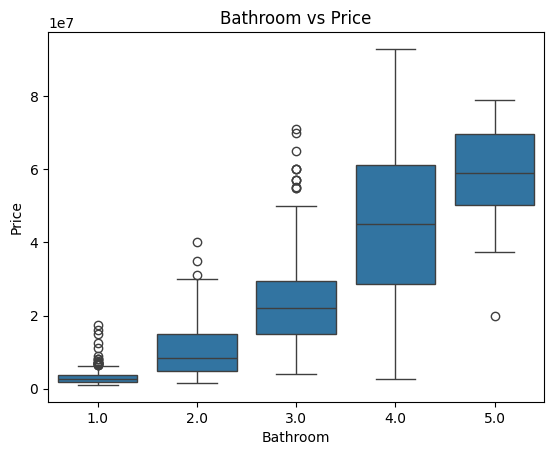

In [69]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

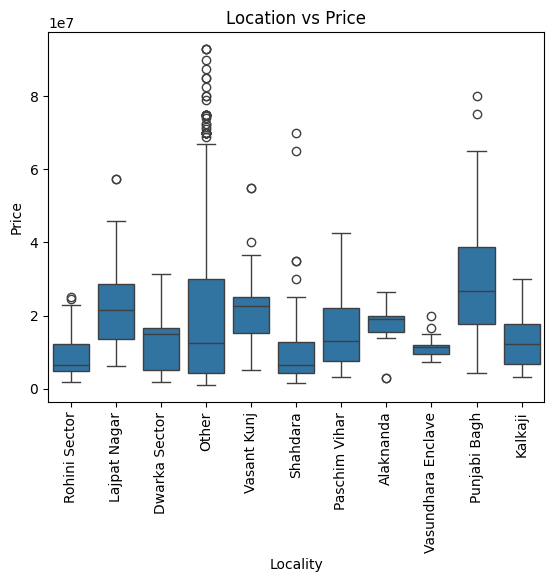

In [70]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Furnishing vs Price')

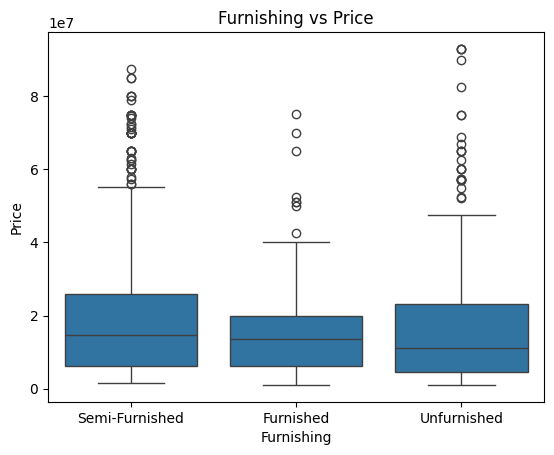

In [71]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = df).set_title('Furnishing vs Price')

Text(0.5, 1.0, 'Price vs Type')

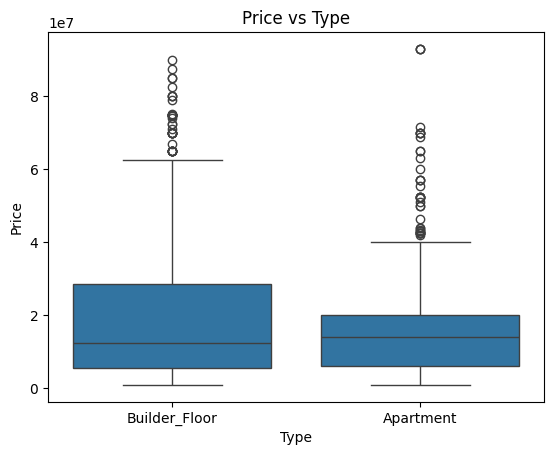

In [72]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Price vs Type')

In [73]:
le = LabelEncoder()
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


In [74]:
min_max = MinMaxScaler()
df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']] = MinMaxScaler().fit_transform(df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']])

<AxesSubplot:>

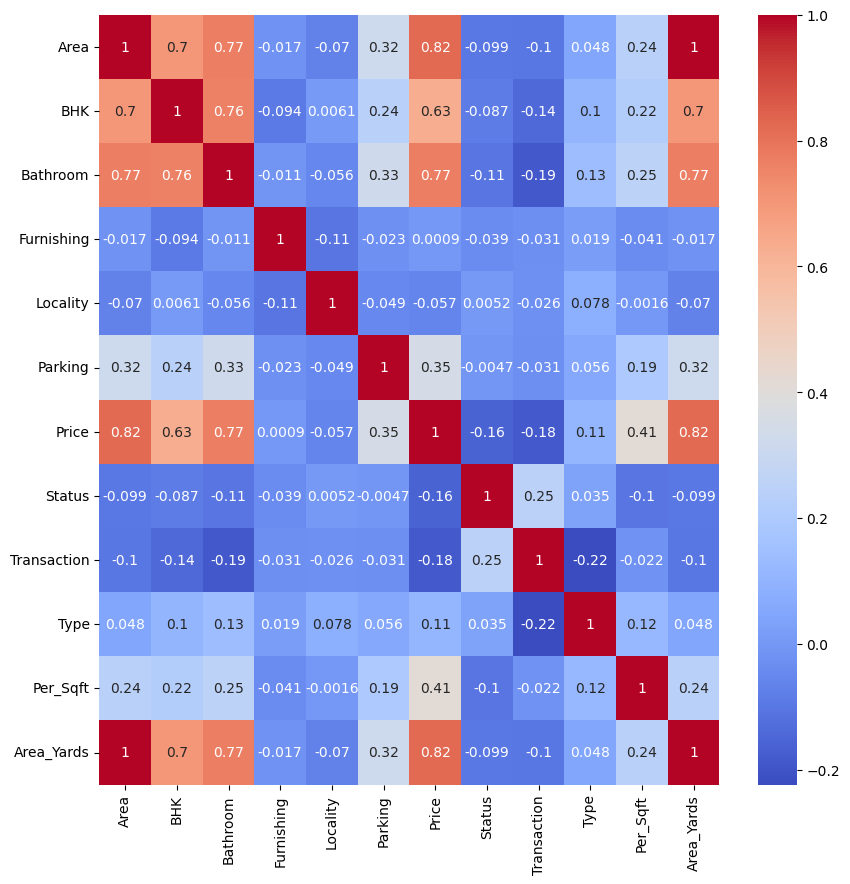

In [75]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [76]:
df.drop(['Per_Sqft'],axis=1,inplace=True)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

# decision tree

In [93]:
dtr = DecisionTreeRegressor(max_depth=6, min_samples_split=8, min_samples_leaf=1, random_state=42)
dtr.fit(X_train, y_train)

dtr_score = dtr.score(X_train, y_train)
print(f"Decision Tree Regressor Training Accuracy: {dtr_score:.2f}")

Decision Tree Regressor Training Accuracy: 0.85


# random forest

In [94]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

rfr_score = rfr.score(X_train, y_train)
print(f"Random Forest Regressor Training Accuracy: {rfr_score:.2f}")

Random Forest Regressor Training Accuracy: 0.96


# Model Comparison

In [95]:
dtr_pred = dtr.predict(X_test)
rfr_pred = rfr.predict(X_test)

# Evaluating models
print("Decision Tree Regressor Evaluation Metrics:")
print("R2 Score: ", r2_score(y_test, dtr_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, dtr_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtr_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, dtr_pred)))

print("\nRandom Forest Regressor Evaluation Metrics:")
print("R2 Score: ", r2_score(y_test, rfr_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, rfr_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfr_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, rfr_pred)))

Decision Tree Regressor Evaluation Metrics:
R2 Score:  0.829160558769424
Mean Squared Error:  0.006271711839596123
Mean Absolute Error:  0.05365863521857312
Root Mean Squared Error:  0.07919414018471393

Random Forest Regressor Evaluation Metrics:
R2 Score:  0.8465114813432397
Mean Squared Error:  0.005634739570486172
Mean Absolute Error:  0.04662689798745586
Root Mean Squared Error:  0.07506490238777488


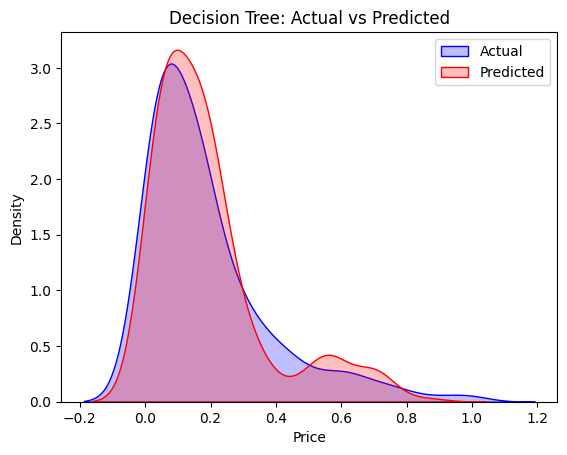

In [96]:
sns.kdeplot(y_test, color='blue', label='Actual', fill=True)
sns.kdeplot(dtr_pred, color='red', label='Predicted', fill=True)
plt.title("Decision Tree: Actual vs Predicted")
plt.legend()
plt.show()

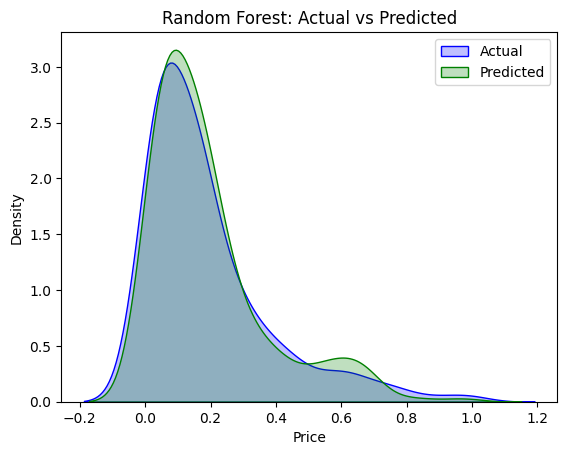

In [97]:
sns.kdeplot(y_test, color='blue', label='Actual', fill=True)
sns.kdeplot(rfr_pred, color='green', label='Predicted', fill=True)
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.show()

# Collecting Metrics

In [98]:
metrics_comparison = pd.DataFrame({
    'Metric': ['R2 Score', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'],
    'Decision Tree': [
        r2_score(y_test, dtr_pred),
        mean_squared_error(y_test, dtr_pred),
        mean_absolute_error(y_test, dtr_pred),
        np.sqrt(mean_squared_error(y_test, dtr_pred))
    ],
    'Random Forest': [
        r2_score(y_test, rfr_pred),
        mean_squared_error(y_test, rfr_pred),
        mean_absolute_error(y_test, rfr_pred),
        np.sqrt(mean_squared_error(y_test, rfr_pred))
    ]
})
metrics_comparison

,Metric,Decision Tree,Random Forest
0,R2 Score,0.829161,0.846511
1,Mean Squared Error (MSE),0.006272,0.005635
2,Mean Absolute Error (MAE),0.053659,0.046627
3,Root Mean Squared Error (RMSE),0.079194,0.075065


# Plotting Metrics as Bar Graph

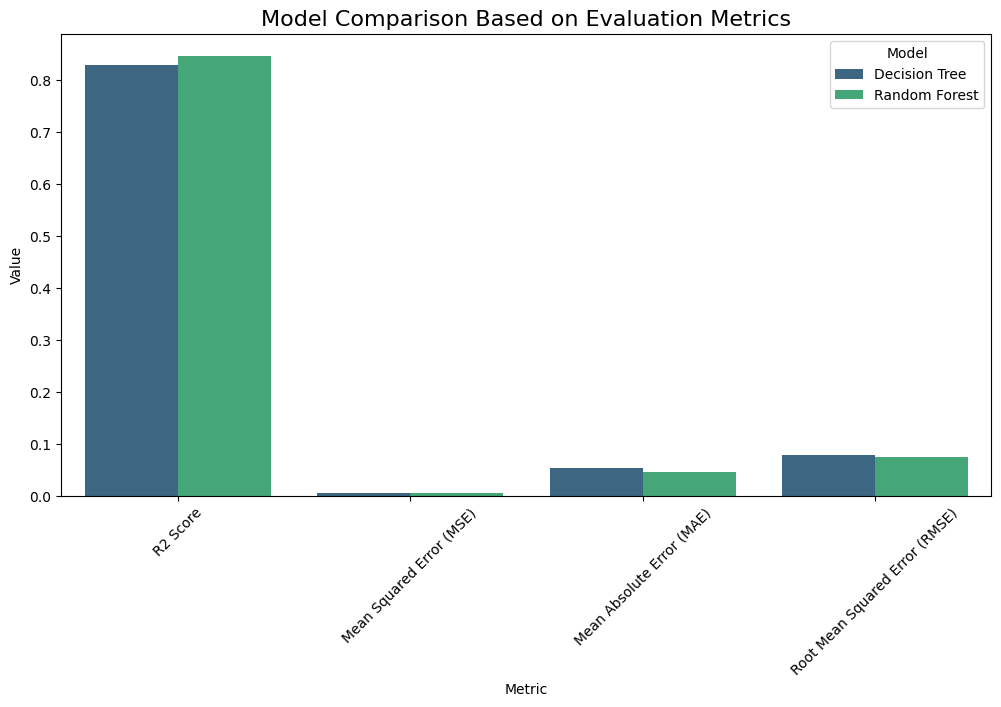

In [99]:
metrics_comparison_melted = metrics_comparison.melt(id_vars=['Metric'], var_name='Model', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_comparison_melted, x='Metric', y='Value', hue='Model', palette='viridis')
plt.title('Model Comparison Based on Evaluation Metrics', fontsize=16)
plt.ylabel('Value')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()


# Line Plot for Metric Trends

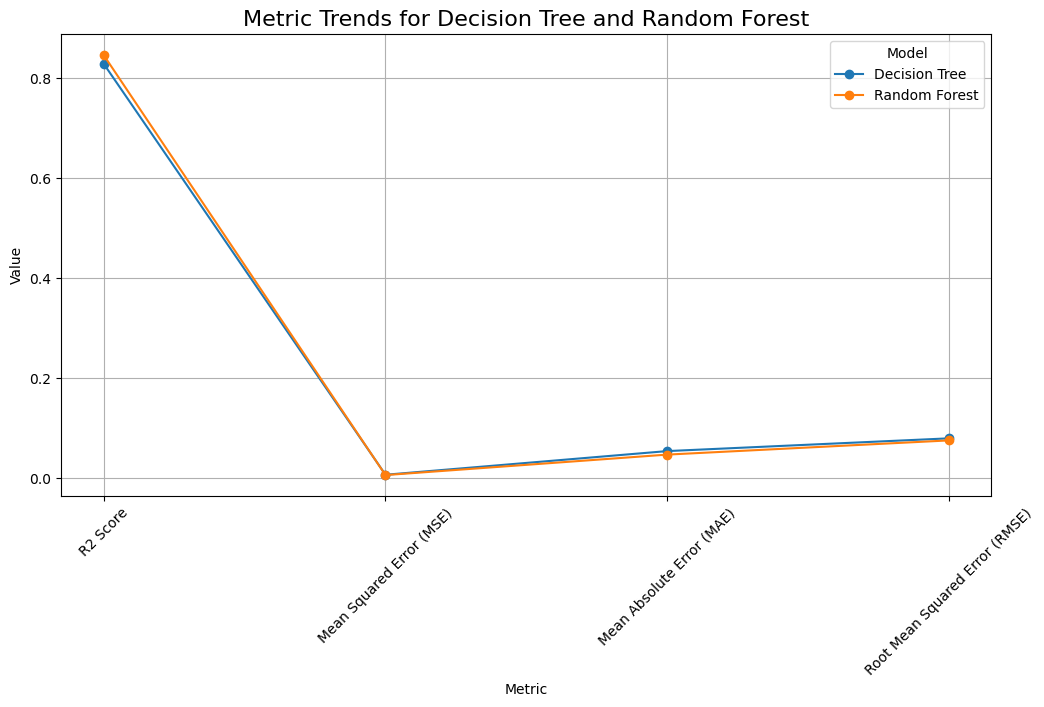

In [100]:
plt.figure(figsize=(12, 6))
for model in ['Decision Tree', 'Random Forest']:
    plt.plot(metrics_comparison['Metric'], metrics_comparison[model], marker='o', label=model)

plt.title('Metric Trends for Decision Tree and Random Forest', fontsize=16)
plt.ylabel('Value')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.grid()
plt.show()


# Conclusion
Based on the evaluation metrics for the Decision Tree and Random Forest models, the following insights can be drawn:

## R² Score:

The Random Forest Regressor achieved a slightly higher R² score (0.846) compared to the Decision Tree (0.829).
This indicates that the Random Forest model explains the variance in the target variable (house prices) better.

## Mean Squared Error (MSE):

The MSE of the Random Forest model (0.005635) is lower than the Decision Tree's MSE (0.006272).
A lower MSE implies that the Random Forest model makes fewer errors in predicting house prices.

## Mean Absolute Error (MAE):

The Random Forest model has a smaller MAE (0.046627) than the Decision Tree (0.053659).
This suggests that the Random Forest model's predictions are closer to the actual values on average.

## Root Mean Squared Error (RMSE):

The RMSE for Random Forest (0.075065) is lower than that of the Decision Tree (0.079194).
A lower RMSE value highlights that the Random Forest model has smaller deviations from the actual house prices.

## Key Observations:
The Random Forest Regressor outperforms the Decision Tree Regressor in all metrics.
It offers better accuracy and reliability for predicting house prices, making it the preferred model in this case.
The comparative metrics and their analysis clearly demonstrate that the Random Forest Regressor is better suited for this task due to its ability to capture complex patterns and reduce prediction errors effectively.